In [1]:
install.packages("MASS")
library("MASS")
install.packages("tidyverse")
library("tidyverse")
install.packages("caret")
library("caret")
install.packages("pROC")
library("pROC")

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'MASS' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'MASS'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\MASS\libs\x64\MASS.dll to C:\Users\2198K\Documents\R\win-library\3.6\MASS\libs\x64\MASS.dll: Permission denied"
Warning message:
"restored 'MASS'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpGGR2vG\downloaded_packages


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpGGR2vG\downloaded_packages


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x dplyr::select() masks MASS::select()

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'caret' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'caret'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\caret\libs\x64\caret.dll to C:\Users\2198K\Documents\R\win-library\3.6\caret\libs\x64\caret.dll: Permission denied"
Warning message:
"restored 'caret'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpGGR2vG\downloaded_packages


Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'pROC' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'pROC'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\2198K\Documents\R\win-library\3.6\00LOCK\pROC\libs\x64\pROC.dll to C:\Users\2198K\Documents\R\win-library\3.6\pROC\libs\x64\pROC.dll: Permission denied"
Warning message:
"restored 'pROC'"



The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpGGR2vG\downloaded_packages


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




In [2]:
ionomics <- read.csv('geneva_z_transformed.csv',colClasses =c("NULL","NULL",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,
                                                                    NA,NA,NA,NA,NA,NA,NA))
ionomics = ionomics[0:200,]

In [3]:
# Split the data into training (80%) and test set (20%)
set.seed(123)
training.samples <- ionomics[,2] %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data <- ionomics[training.samples, ]
test.data <- ionomics[-training.samples, ]

In [4]:
# Fit the model
model <- lda(spec_as_int~., data = train.data)
# Make predictions
predictions <- model %>% predict(test.data)
# Model accuracy
mean(predictions$class==test.data$spec_as_int)
model

[1] 0.7

Call:
lda(spec_as_int ~ ., data = train.data)

Prior probabilities of groups:
         1          2          3          4          5          6          7 
0.05660377 0.02515723 0.15094340 0.22012579 0.01886792 0.35220126 0.11949686 
         8 
0.05660377 

Group means:
          B11         Na23        Mg26       Al27         P31        S34
1 -0.07457830  1.096685904  0.08024358  0.4241580 -0.26530028 -0.4425054
2 -0.07281952 -0.674009943 -0.49009831  0.3103029 -0.74683384 -0.5745285
3 -0.61561082 -0.250845646  0.06800760  0.1525811  0.81158671  0.7484194
4 -0.51483558  0.002619882  1.17842663  0.4455115 -0.26554258  0.2616863
5 -1.36763570  0.503713441 -1.06472621 -0.4760359  0.75620306 -0.5234676
6  0.51782933  0.330860427 -0.50153453 -0.1266648 -0.07640705 -0.0253093
7  0.49950951 -0.382245573 -0.14073305 -0.8018896 -0.34919261 -0.7036626
8 -0.02202672 -0.768659997 -0.63591817 -0.4474591 -0.29235776 -0.4641288
          K39        Ca44        Fe54        Mn55       Co59        Ni6

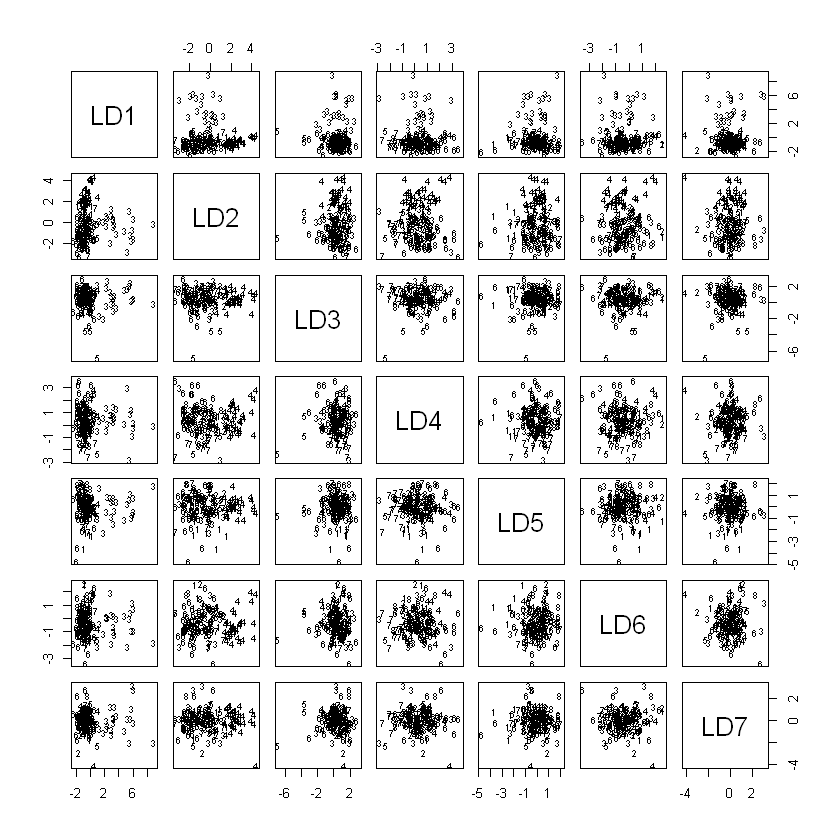

In [5]:
plot(model)

In [6]:
# Predicted classes
head(predictions$class, 6)
# Predicted probabilities of class memebership.
head(predictions$posterior, 6) 
# Linear discriminants
head(predictions$x, 3) 

[1] 1 6 1 6 4 3
Levels: 1 2 3 4 5 6 7 8

,1,2,3,4,5,6,7,8
1,6.531628e-01,2.860441e-05,2.355660e-06,6.165282e-05,5.855987e-09,3.191977e-01,2.740278e-02,1.440420e-04
7,1.304173e-01,3.734028e-03,4.503842e-06,1.764127e-03,1.923838e-06,8.118578e-01,1.996784e-02,3.225241e-02
9,8.004200e-01,1.171637e-02,7.930533e-07,1.295248e-02,3.060880e-11,6.909516e-02,9.836253e-02,7.452683e-03
14,4.140850e-03,2.725779e-02,7.335899e-04,2.094436e-04,5.348062e-11,5.722625e-01,2.631784e-01,1.322174e-01
15,1.392423e-02,2.197624e-01,2.473454e-07,4.498293e-01,5.752140e-09,4.134806e-02,6.032748e-02,2.148084e-01
23,9.875920e-09,1.234544e-07,9.999885e-01,3.374325e-07,2.937303e-15,8.036124e-06,7.985209e-08,2.869615e-06


,LD1,LD2,LD3,LD4,LD5,LD6,LD7
1,-0.6622487,-1.4358501,0.2594505,0.09175066,-3.456246,-0.2248985,-0.5073764
7,-0.8436805,-0.7899398,-0.8206613,0.37331670,-1.141337,1.1602583,0.9421341
9,-1.0967739,0.3016987,1.4762746,-0.64426454,-1.539720,1.1185976,-0.8082491


In [7]:
table <- table(Predicted=predictions$class, spec_as_int=test.data$spec_as_int)
print(confusionMatrix(table))

Confusion Matrix and Statistics

         spec_as_int
Predicted  1  2  3  4  5  6  7  8
        1  2  0  0  0  0  0  0  0
        2  0  0  0  0  0  0  0  0
        3  0  0  4  0  0  0  0  0
        4  0  1  0  5  1  2  2  1
        5  0  0  0  0  1  0  0  0
        6  1  1  1  0  0 12  0  0
        7  0  0  0  0  0  0  4  0
        8  0  0  0  0  0  1  1  0

Overall Statistics
                                          
               Accuracy : 0.7             
                 95% CI : (0.5347, 0.8344)
    No Information Rate : 0.375           
    P-Value [Acc > NIR] : 3.088e-05       
                                          
                  Kappa : 0.6181          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity            0.6667     0.00   0.8000   1.0000   0.5000    0.800
Specificity            1.0000     1.00   1.0000   0.8000   1

In [8]:
mn.net <- nnet::multinom(spec_as_int ~ ., train.data)
ionomics.predictions <- predict(mn.net, newdata=test.data, type="prob")
ionomics.predictions <- as.data.frame(ionomics.predictions)
auc <- multiclass.roc(test.data$spec_as_int, ionomics.predictions, percent=TRUE)
print(auc)

# weights:  168 (140 variable)
initial  value 330.631205 
iter  10 value 63.280422
iter  20 value 37.735934
iter  30 value 17.792910
iter  40 value 1.081613
iter  50 value 0.005179
final  value 0.000066 
converged

Call:
multiclass.roc.default(response = test.data$spec_as_int, predictor = ionomics.predictions,     percent = TRUE)

Data: multivariate predictor ionomics.predictions with 8 levels of test.data$spec_as_int: 1, 2, 3, 4, 5, 6, 7, 8.
Multi-class area under the curve: 76.58%


In [9]:
install.packages("klaR")
library(klaR) # for NaiveBayes

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'klaR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpGGR2vG\downloaded_packages


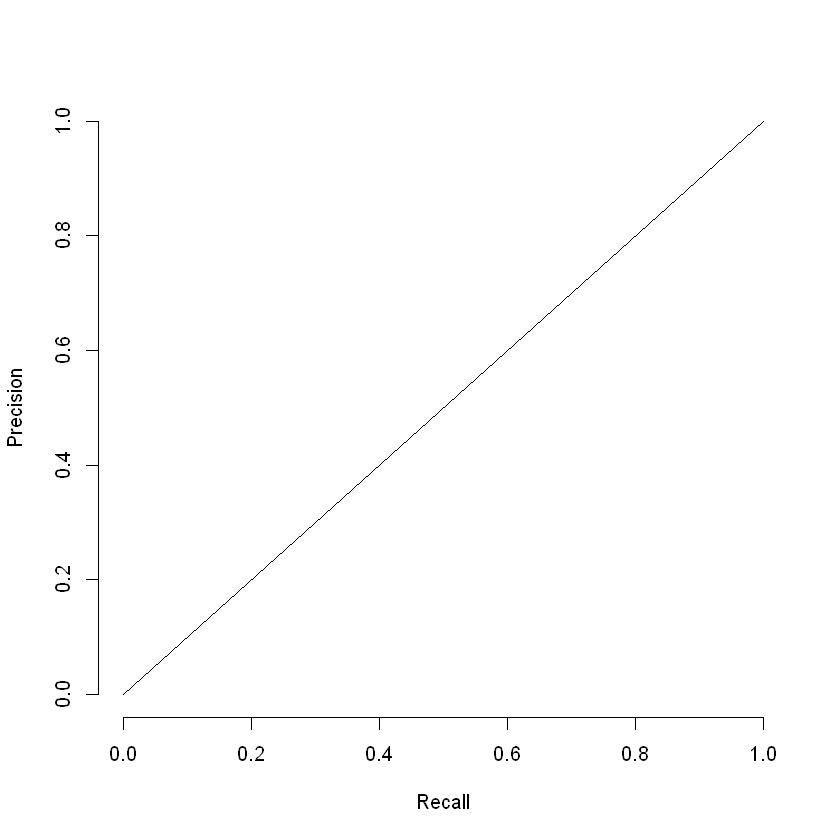

In [11]:
plot(x=NA, y=NA, xlim=c(0,1), ylim=c(0,1),
     ylab="Precision",
     xlab="Recall",
     bty='n')
colors <- c("red", "blue", "green")
aucs <- rep(NA, length(levels(ionomics$spec_as_int))) # store AUCs
for (i in seq_along(levels(ionomics$spec_as_int))) {
  cur.class <- levels(ionomics$spec_as_int)[i]
  binary.labels <- as.factor(train.data$spec_as_int == cur.class)
  # binarize the classifier you are using (NB is arbitrary)
  model <- NaiveBayes(binary.labels ~ ., data = train.data)
  pred <- predict(model, test.data, type='raw')
  score <- pred$posterior[, 'TRUE'] # posterior for  positive class
  test.labels <- test.data$spec_as_int == cur.class
  pred <- prediction(score, test.labels)
  perf <- performance(pred, "prec", "rec")
  roc.x <- unlist(perf@x.values)
  roc.y <- unlist(perf@y.values)
  lines(roc.y ~ roc.x, col = colors[i], lwd = 2)
  # store AUC
  auc <- performance(pred, "auc")
  auc <- unlist(slot(auc, "y.values"))
  aucs[i] <- auc
}
lines(x=c(0,1), c(0,1))